## High Frequency Words - Chunjie Nan

### Assignment Overview


1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

### 1. Choose a corpus of interest.

I choose the Gutenburg library that can be downloaded from the NLTK package, and the corpus I decided to work on this assignemnt is emma corpus.

In [29]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt



In [2]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

### 2. Total Unique Words.

Count first 50 words without duplications.

In [3]:
print(*sorted(set(emma))[:100], sep = "   ")

!   !"   !"--   !'   !'--   !)--   !--   !--"   !--(   !--`   "   "'   "--   "`   &   '   '--   ';   (   )   ),   )--   ).   ).--   );--   ,   ,"   ,"--   ,'   ,'"   ,)   ,--   ,--"   -   --   --"   --(   --,   ----   ----------,   --------.'   --.   --."   --.'   --:   --`   .   ."   ."--   .'   .'"   .'--   .'--`   .)   .,   .,"   .,'   .--   .--"   .--`   .]   000   10   1816   23rd   24th   26th   28th   7th   8th   :   :"   :"--   :'   :'--   :--   :--"   ;   ;"   ;"--   ;'   ;'--   ;--   ;--"   ?   ?"   ?"--   ?"--"   ?'   ?'"   ?)--   ?--   ?--"   ?--(   A   Abbey   Abbots   Abdy   Abominable   About


Need to count the english words only

In [4]:
Emma = [word.lower() for word in emma if word.isalpha()]

# print
print(*Emma[:100], sep = "   ")

emma   by   jane   austen   volume   i   chapter   i   emma   woodhouse   handsome   clever   and   rich   with   a   comfortable   home   and   happy   disposition   seemed   to   unite   some   of   the   best   blessings   of   existence   and   had   lived   nearly   twenty   one   years   in   the   world   with   very   little   to   distress   or   vex   her   she   was   the   youngest   of   the   two   daughters   of   a   most   affectionate   indulgent   father   and   had   in   consequence   of   her   sister   s   marriage   been   mistress   of   his   house   from   a   very   early   period   her   mother   had   died   too   long   ago   for   her   to   have   more   than   an   indistinct   remembrance   of   her


In [5]:
len(set(Emma))

7079

There are 7079 English unique words in the Emma corpus.

### 3. How many unique words represent half of all words.

Need to find the frequency distribution of Emma, and create a function that counts the most frequent english words that takes half of all words.

In [6]:
fdist = nltk.FreqDist(Emma)
fdist


FreqDist({'to': 5239, 'the': 5201, 'and': 4896, 'of': 4291, 'i': 3178, 'a': 3129, 'it': 2528, 'her': 2469, 'was': 2398, 'she': 2340, ...})

In [7]:
total_words=len(Emma)
tcount=0
wcount=0
for word, count in fdist.most_common():
    tcount=tcount+count
    wcount=wcount+1
    if tcount>(total_words/2):
        print(wcount)
        break

56


The most frequent 56 English words, covers 50% of the all words.

In [8]:
print([w for w,n in fdist.most_common()[:58]])

['to', 'the', 'and', 'of', 'i', 'a', 'it', 'her', 'was', 'she', 'in', 'not', 'you', 'be', 'that', 'he', 'had', 'but', 'as', 'for', 'have', 'is', 'with', 'very', 'mr', 'his', 'at', 'so', 's', 'emma', 'all', 'could', 'would', 'been', 'him', 'no', 'my', 'mrs', 'on', 'any', 'do', 'were', 'miss', 'me', 'by', 'will', 'must', 'which', 'there', 'from', 'they', 'what', 'this', 'harriet', 'or', 'such', 'much', 'if']


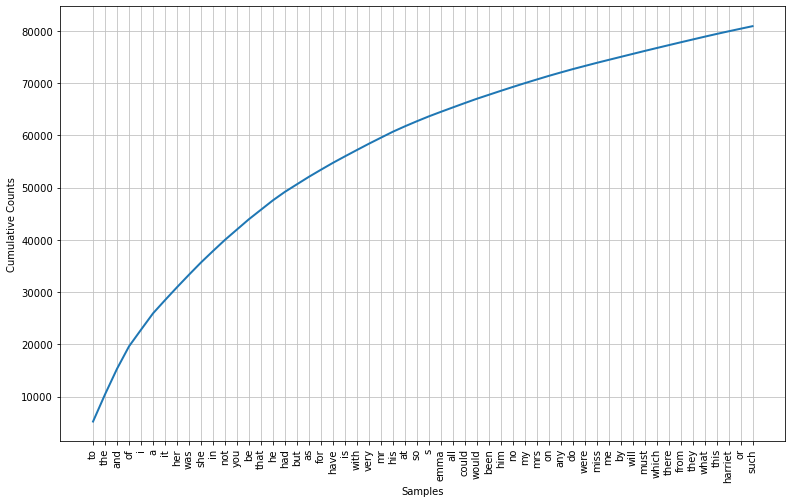

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [9]:
plt.figure(figsize=(13,8))
fdist.plot(56, cumulative = True)

### 4. 200 most frequent words.

In [10]:
wlist = []
for i in range(0, 200, 25):
    df = pd.DataFrame(fdist.most_common()[i:(i+25)])
    df.columns=['word', 'count']
    wlist.append(df)

pd.concat(wlist, axis=1)

,word,count,word,count,word,count,word,count,word,count,word,count,word,count,word,count
0,to,5239,his,1145,they,540,your,364,too,254,made,199,long,146,its,122
1,the,5201,at,1031,what,536,when,363,before,250,body,193,rather,146,look,121
2,and,4896,so,974,this,526,little,359,has,250,ever,193,himself,146,going,120
3,of,4291,s,935,harriet,506,being,358,about,249,oh,193,us,145,heard,120
4,i,3178,emma,865,or,494,never,358,most,248,day,192,hope,143,moment,120
5,a,3129,all,845,such,489,good,358,dear,241,young,192,done,142,came,119
6,it,2528,could,837,much,486,did,352,fairfax,241,up,190,cannot,142,last,119
7,her,2469,would,820,if,485,we,349,always,238,two,178,seemed,141,take,119
8,was,2398,been,759,said,484,only,341,man,235,friend,177,over,139,half,118
9,she,2340,him,759,more,467,know,337,thought,226,though,177,away,138,love,117


### 5. Relative frequency of the 200 words.

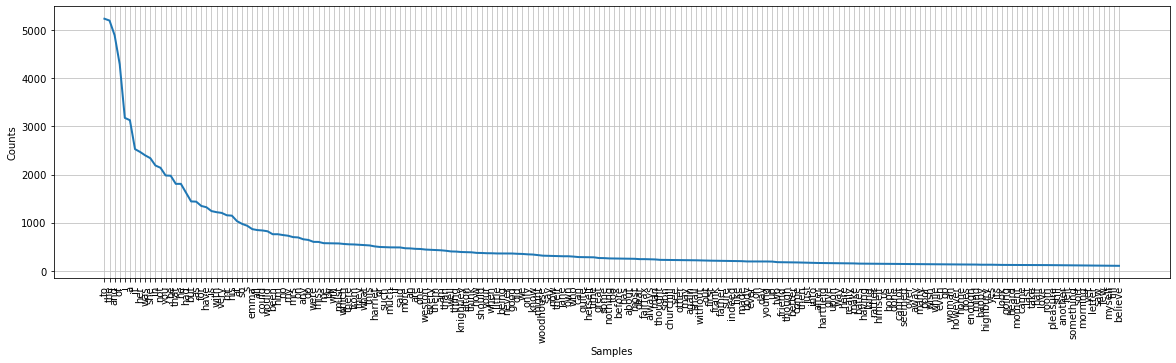

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
plt.figure(figsize=(20,5))
fdist.plot(200, )

### 6. Does the observed relative frequency of these words follow Zipf’s law? Explain

Zipf's law (/zɪf/, not /tsɪpf/ as in German) is an empirical law formulated using mathematical statistics that refers to the fact that for many types of data studied in the physical and social sciences, the rank-frequency distribution is an inverse relation. The Zipfian distribution is one of a family of related discrete power law probability distributions. It is related to the zeta distribution, but is not identical.
Zipf's law was originally formulated in terms of quantitative linguistics, stating that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc. 
https://en.m.wikipedia.org/wiki/Zipf%27s_law


In [12]:
mostf = fdist.most_common()[0][1]
expected_counts = []
rank = 0
for i in range(len(fdist)):
    rank += 1
    expected_counts.append(round(mostf * (1/rank)))

expected_counts

zipfs = pd.DataFrame(fdist.most_common())
zipfs.columns=['Word', 'Actual']
#pd.concat(zipfs_df, axis=1)
zipfs["Zipf"] = expected_counts
zipfs['Difference'] = zipfs['Actual'] - zipfs["Zipf"]
zipfs['Percent Difference'] = round(((zipfs['Actual'] / zipfs["Zipf"])
                                        - 1) *100).astype(int)
zipfs.head(20)

,Word,Actual,Zipf,Difference,Percent Difference
0,to,5239,5239,0,0
1,the,5201,2620,2581,99
2,and,4896,1746,3150,180
3,of,4291,1310,2981,228
4,i,3178,1048,2130,203
5,a,3129,873,2256,258
6,it,2528,748,1780,238
7,her,2469,655,1814,277
8,was,2398,582,1816,312
9,she,2340,524,1816,347


According to the table, the Zipf's expected count gets further away from the actual as the number of counts increases.


### 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

I found the website listed the 1000 most common words in english.
With the listed words, I can compare the corpus emma corpus to see the diffrence.

In [18]:
web_english_words = pd.read_html('https://strommeninc.com/1000-most-common-words-in-english-strommen-languages/', 
                 header=0, index_col=None)
web_english_words = web_english_words[0]
web_english_words['Word'] = web_english_words['Word'].str.lower()
web_english_words

,rank,Word
0,1,the
1,2,be
2,3,and
3,4,a
4,5,of
...,...,...
995,996,army
996,997,top
997,998,post
998,999,charge


Find out the top frequntly used words in emma corpus.

In [19]:
emma_100 = pd.DataFrame(fdist.most_common()[:100], columns = ['Emma_words', 'Emma_frequency'])
emma_100['Emma_rank'] = emma_100.index +1
emma_100

,Emma_words,Emma_frequency,Emma_rank
0,to,5239,1
1,the,5201,2
2,and,4896,3
3,of,4291,4
4,i,3178,5
...,...,...,...
95,herself,279,96
96,time,279,97
97,great,264,98
98,some,262,99


Merge the emma table and the list from the website.

In [26]:
pd.set_option('display.max_rows', 500)
words_merged = pd.merge(emma_100,web_english_words, left_on = 'Emma_words', right_on = 'Word', how = 'outer' )
top_100 = words_merged.fillna('')
top_100

,Emma_words,Emma_frequency,Emma_rank,rank,Word
0,to,5239.0,1.0,6.0,to
1,to,5239.0,1.0,12.0,to
2,the,5201.0,2.0,1.0,the
3,and,4896.0,3.0,3.0,and
4,of,4291.0,4.0,5.0,of
...,...,...,...,...,...
1016,,,,992.0,manage
1017,,,,994.0,date
1018,,,,996.0,army
1019,,,,999.0,charge


Different belongings or unmatching words either in Emma corpus or listed on the website.

In [28]:
unmatch = top_100[['Emma_words','Emma_rank','rank','Word']]
unmatch = unmatch[(unmatch['Emma_words']=='')| (unmatch['Word']=='')]
unmatch.reset_index(inplace = True)
unmatch

,index,Emma_words,Emma_rank,rank,Word
0,10,was,9.0,,
1,21,had,17.0,,
2,28,is,22.0,,
3,31,mr,25.0,,
4,36,s,29.0,,
...,...,...,...,...,...
913,1016,,,992.0,manage
914,1017,,,994.0,date
915,1018,,,996.0,army
916,1019,,,999.0,charge


The table shows the difference in words between emma corps and the commonly used words listed on the website.